Intro: Farmer's Markets

In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import folium

In [2]:
# data obtained from:
# http://www.ams.usda.gov/local-food-directories/farmersmarkets

# discovered folium through:
# http://blog.dominodatalab.com/creating-interactive-crime-maps-with-folium/

In [3]:
# TODO:
# explain dataset and walkthru of data import

In [4]:
df = pd.read_csv(r'data/usda-ams_farmers-market-locations.csv')

In [5]:
df.columns

Index([u'FMID', u'MarketName', u'Website', u'Facebook', u'Twitter', u'Youtube',
       u'OtherMedia', u'street', u'city', u'County', u'State', u'zip',
       u'Season1Date', u'Season1Time', u'Season2Date', u'Season2Time',
       u'Season3Date', u'Season3Time', u'Season4Date', u'Season4Time', u'x',
       u'y', u'Location', u'Credit', u'WIC', u'WICcash', u'SFMNP', u'SNAP',
       u'Organic', u'Bakedgoods', u'Cheese', u'Crafts', u'Flowers', u'Eggs',
       u'Seafood', u'Herbs', u'Vegetables', u'Honey', u'Jams', u'Maple',
       u'Meat', u'Nursery', u'Nuts', u'Plants', u'Poultry', u'Prepared',
       u'Soap', u'Trees', u'Wine', u'Coffee', u'Beans', u'Fruits', u'Grains',
       u'Juices', u'Mushrooms', u'PetFood', u'Tofu', u'WildHarvested',
       u'updateTime'],
      dtype='object')

In [6]:
df.head()

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,1000618,100-Mile Market,http://www.peoplesfoodco-op.org/,NaN,NaN,NaN,NaN,507 Harrison Street,Kalamazoo,Kalamazoo,...,Y,N,Y,N,N,Y,N,N,Y,4/24/2014 6:22:51 PM
1,1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,NaN,NaN,NaN,NaN,106 S. Main Street,Six Mile,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
2,1010691,10th Steet Community Farmers Market,NaN,NaN,NaN,NaN,http://agrimissouri.com/mo-grown/grodetail.php...,10th Street and Poplar,Lamar,Barton,...,N,N,Y,N,N,N,N,N,N,10/28/2014 9:49:46 AM
3,1002454,112st Madison Avenue,NaN,NaN,NaN,NaN,NaN,112th Madison Avenue,New York,New York,...,N,N,N,N,N,N,N,N,N,3/1/2012 10:38:22 AM
4,1011100,12 South Farmers Market,http://www.12southfarmersmarket.com,12_South_Farmers_Market,@12southfrmsmkt,NaN,@12southfrmsmkt,3000 Granny White Pike,Nashville,Davidson,...,Y,N,Y,N,Y,Y,Y,N,N,5/1/2015 10:40:56 AM


In [21]:
df.columns

Index([u'FMID', u'MarketName', u'Website', u'Facebook', u'Twitter', u'Youtube',
       u'OtherMedia', u'street', u'city', u'County', u'State', u'zip',
       u'Season1Date', u'Season1Time', u'Season2Date', u'Season2Time',
       u'Season3Date', u'Season3Time', u'Season4Date', u'Season4Time', u'x',
       u'y', u'Location', u'Credit', u'WIC', u'WICcash', u'SFMNP', u'SNAP',
       u'Organic', u'Bakedgoods', u'Cheese', u'Crafts', u'Flowers', u'Eggs',
       u'Seafood', u'Herbs', u'Vegetables', u'Honey', u'Jams', u'Maple',
       u'Meat', u'Nursery', u'Nuts', u'Plants', u'Poultry', u'Prepared',
       u'Soap', u'Trees', u'Wine', u'Coffee', u'Beans', u'Fruits', u'Grains',
       u'Juices', u'Mushrooms', u'PetFood', u'Tofu', u'WildHarvested',
       u'updateTime', u'city_state'],
      dtype='object')

In [ ]:
df['city_state'] = df['city'] + ', ' + df['State']

0                            Private business parking lot
1                                                     NaN
2                                                     NaN
3                            Private business parking lot
4                                                     NaN
5               Federal/State government building grounds
6       On a farm from: a barn, a greenhouse, a tent, ...
7                                                   Other
8                                                     NaN
9                                Closed-off public street
10      Faith-based institution (e.g., church, mosque,...
11                                                    NaN
12                                                    NaN
13                               Closed-off public street
14                      Local government building grounds
15                           Private business parking lot
16                      Local government building grounds
17            

In [20]:
df

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,...,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime,city_state
0,1000618,100-Mile Market,http://www.peoplesfoodco-op.org/,NaN,NaN,NaN,NaN,507 Harrison Street,Kalamazoo,Kalamazoo,...,N,Y,N,N,Y,N,N,Y,4/24/2014 6:22:51 PM,"Kalamazoo, Michigan"
1,1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,NaN,NaN,NaN,NaN,106 S. Main Street,Six Mile,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,"Six Mile, South Carolina"
2,1010691,10th Steet Community Farmers Market,NaN,NaN,NaN,NaN,http://agrimissouri.com/mo-grown/grodetail.php...,10th Street and Poplar,Lamar,Barton,...,N,Y,N,N,N,N,N,N,10/28/2014 9:49:46 AM,"Lamar , Missouri"
3,1002454,112st Madison Avenue,NaN,NaN,NaN,NaN,NaN,112th Madison Avenue,New York,New York,...,N,N,N,N,N,N,N,N,3/1/2012 10:38:22 AM,"New York, New York"
4,1011100,12 South Farmers Market,http://www.12southfarmersmarket.com,12_South_Farmers_Market,@12southfrmsmkt,NaN,@12southfrmsmkt,3000 Granny White Pike,Nashville,Davidson,...,N,Y,N,Y,Y,Y,N,N,5/1/2015 10:40:56 AM,"Nashville, Tennessee"
5,1009845,125th Street Fresh Connect Farmers' Market,http://www.125thStreetFarmersMarket.com,https://www.facebook.com/125thStreetFarmersMarket,https://twitter.com/FarmMarket125th,NaN,Instagram--> 125thStreetFarmersMarket,"163 West 125th Street and Adam Clayton Powell,...",New York,New York,...,N,Y,N,Y,N,N,N,N,4/7/2014 4:32:01 PM,"New York, New York"
6,1005586,12th & Brandywine Urban Farm Market,NaN,https://www.facebook.com/pages/12th-Brandywine...,NaN,NaN,https://www.facebook.com/delawareurbanfarmcoal...,12th & Brandywine Streets,Wilmington,New Castle,...,N,Y,N,N,N,N,N,N,4/3/2014 3:43:31 PM,"Wilmington, Delaware"
7,1008071,14&U Farmers' Market,NaN,https://www.facebook.com/14UFarmersMarket,https://twitter.com/14UFarmersMkt,NaN,NaN,1400 U Street NW,Washington,District of Columbia,...,Y,Y,Y,Y,N,N,N,N,4/5/2014 1:49:04 PM,"Washington, District of Columbia"
8,1007098,17 on the Square,NaN,NaN,NaN,NaN,NaN,17 Lincoln Square,Gettysburg,Adams,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,"Gettysburg, Pennsylvania"
9,1010284,175th Street Greenmarket,http://www.grownyc.org/ourmarkets,NaN,NaN,NaN,NaN,175th Street at Wadsworth Ave,New York,New York,...,N,Y,N,N,N,N,N,N,6/3/2014 12:38:54 PM,"New York, New York"


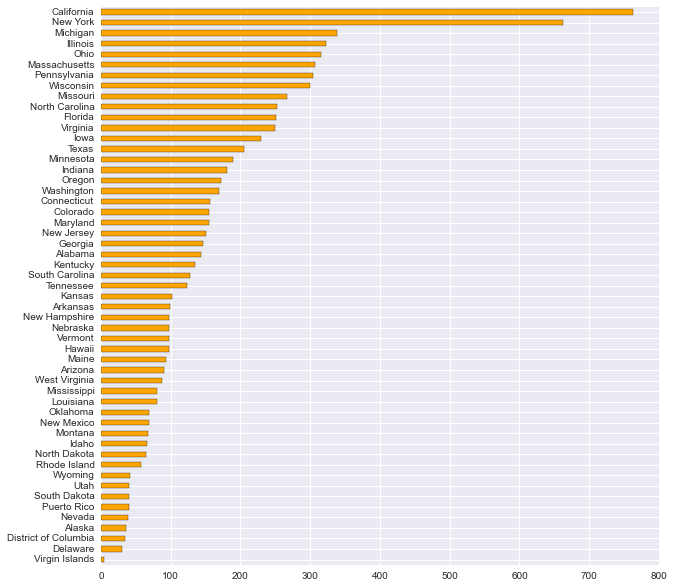

In [19]:
ser = df['State'].value_counts()
ser.sort_values(inplace=True, ascending=True)
ser.plot.barh(color='orange', figsize=(10,10))

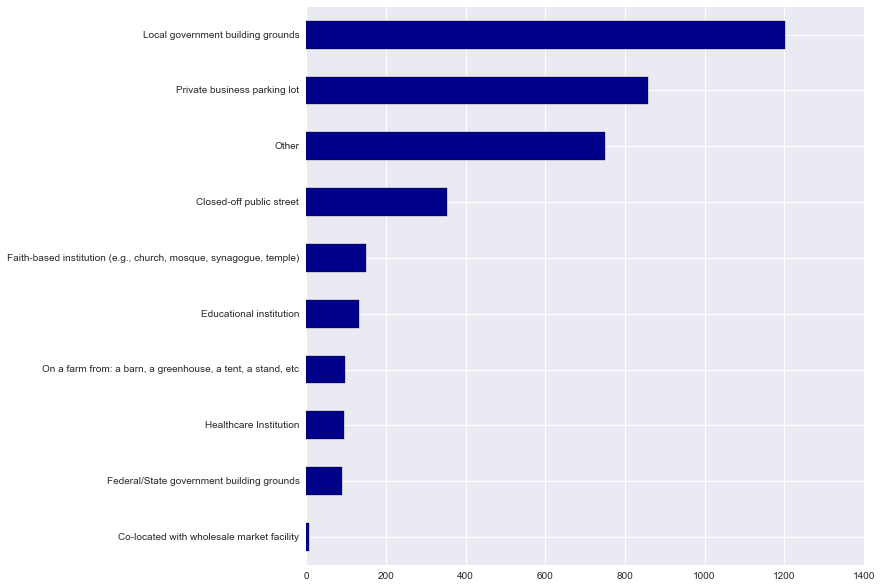

In [28]:
ser = df['Location'].value_counts()
ser.sort_values(inplace=True, ascending=True)
ser.plot.barh(color='darkblue', figsize=(10,10))

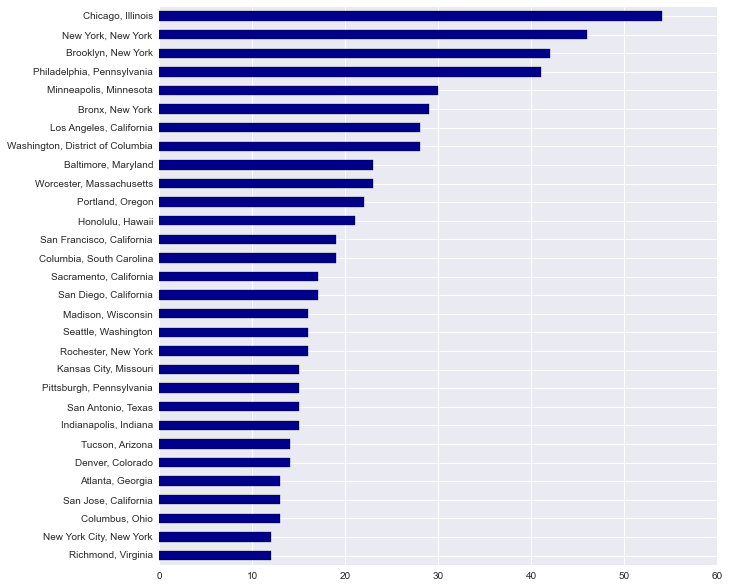

In [31]:
ser = df['city_state'].value_counts()[:30]
ser.sort_values(inplace=True, ascending=True)
ser.plot.barh(color='darkblue', figsize=(10,10))

# folium

In [23]:
len(df)

8493

In [29]:
from IPython.display import HTML

def display(m, height=500):
    """Takes a folium instance and embed HTML."""
    m._build_map()
    srcdoc = m.HTML.replace('"', '&quot;')
    embed = HTML('<iframe srcdoc="{0}" '
                 'style="width: 100%; height: {1}px; '
                 'border: none"></iframe>'.format(srcdoc, height))
    return embed

In [56]:
for r in df[pd.notnull(df['x']) & pd.notnull(df['y'])][0:10].iterrows():
    print([r[1]['y'],r[1]['x']])

[42.29596, -85.57502]
[34.8042, -82.8187]
[37.495628, -94.2746191]
[40.7939, -73.9493]
[36.11837, -86.79070899999999]
[40.8089533, -73.94824770000001]
[39.742117, -75.53446]
[38.9169984, -77.0320505]
[39.8313, -77.2316]
[40.8459583, -73.93780240000001]


In [57]:
MAX_RECORDS = len(df)

# create empty map zoomed
m = folium.Map(location=[40, -98], zoom_start=4)

#add a marker for every record in the filtered data, use a clustered view
for r in df[pd.notnull(df['x']) & pd.notnull(df['y'])][0:MAX_RECORDS].iterrows():  
    m.simple_marker(
        location = [r[1]['y'],r[1]['x']],
        clustered_marker = True)

display(m)

In [ ]:
# TODO:
# study product offering types, in Choropleth map
# integrate geopy package to bolster the x,y coordinates, quantify how much missing x,y are there